<a href="https://colab.research.google.com/github/natbugreal/datascience/blob/main/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import bambi as bmb
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()


# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No, elpd_loo gives us gives us a nice one number summary of which model is better, which is a useful tool to have when our models get two multidimensional to easily parse. Therefore, more than one model is needed for the elpd_loo to really do anything

**Task2**:

Describe overfitting, in the context of this course

Overfitting is basically when a model learns the noise and specific details of the training data too well which would make it less effective at predicting new or "test" data. This happens because the model focuses on irrelevant information instead of general patterns, so simplifying the model helps ensure better performance on future data

**Task3**:

How do we mitigate overfitting?

Selecting a model with the smallest number of variables ensures we are doing our best to avoid overfitting. By reducing complexity, we increase the model's ability to generalize well to new data rather than just fitting the training data too closely.

**Task4**:

How do we mitigate underfitting?

Selecting a model based on elpd_loo ensures we are doing our best to account for underfitting. This approach helps us identify models that correctly capture the underlying patterns in the data, balancing complexity and performance without missing important relationships.


**Task5**:

Why would we want more than one predictor in a model?

Multiple predictors can enhance model accuracy and provide a more comprehensive understanding of the correlations and such in the data. By including more factors, we will notice more complex interactions and dependencies that can influence the outcome, leading to better-informed predictions and insights. :)

**Task6**:

Can we have too many predictors? How would we now?

Yes, we can have too many predictors in a machine learning model: If our model performs very well on training data but poorly on test data, there are probably too many predictors (or overfits)

**Task7**:

What is variable selection, and how does it work?

the process of choosing the most relevant variables to include in a statistical or machine learning model from a larger set of potential predictors

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

These three linear regression models are different in how they handle a continuous and categorical predictor. The first adds them independently, the second uses the categorical variable as a hierarchy allowing varying effects, and the third includes an interaction term. They range in complexity and assumptions, with the choice depending on research needs and data characteristics.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

Visualizing multiple linear regression models fully only rlly works w with two predictors using 3D plots. For more predictors, we use partial plots, pair plots, or fix variables for 2D views. For more than three predictors, complete visualization isn't feasible; instead, we use coefficient tables, fit statistics, and importance plots to interpret the model.


**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [17]:

!pip install bambi

In [18]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)


In [19]:
ft_pos_cat = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [20]:

ft_pos_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 10 divergences after tuning. Increase `target_accept` or reparameterize.


In [22]:
ft_pos_inter = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})


Output()

Output()

In [21]:
ft_pos_3pt_inter = bmb.Model("`FGp` ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [23]:
ft_pos_3pt_inter2 = bmb.Model("`FGp` ~ `FTp` + Pos + `3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})


Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

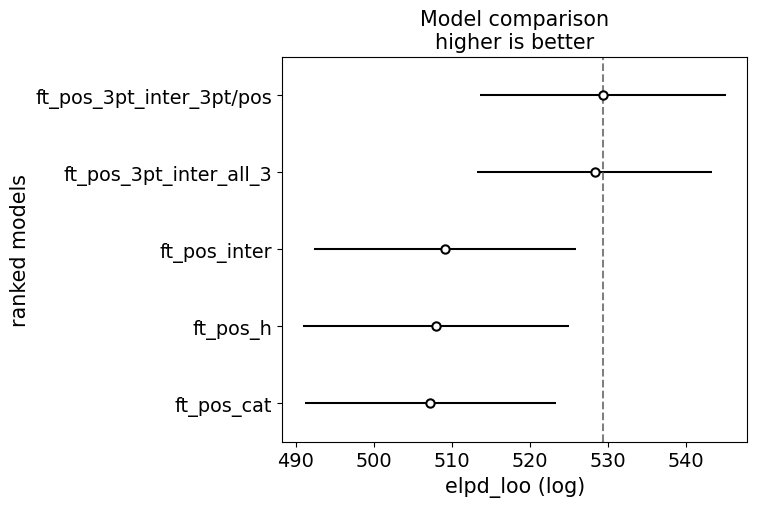

In [24]:
compare = az.compare({"ft_pos_cat":ft_pos_cat, "ft_pos_h":ft_pos_h, "ft_pos_inter":ft_pos_inter, "ft_pos_3pt_inter_all_3":ft_pos_3pt_inter, "ft_pos_3pt_inter_3pt/pos":ft_pos_3pt_inter2})
az.plot_compare(compare)


**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

i think that models that include three-point attempts outperform the others. While the two models are pretty similar, the one that only considers interactions between three-point attempts and position is lowkey better than the model that looks at interactions among all three predictors. I think these two models are more effective because players who take more three-point shots tend to be better overall shooters including their free throw performance. This could be due to many factors like confidence, expereince, or just comfort, and simply that practicing three-point shots enhances shooting skills, and players who struggle with shooting are less inclined to attempt three-pointers.